# Mikołaj Pietrynko
# IoT Network Intrusion Dataset - Data Science IDDS_2025
#### https://www.kaggle.com/datasets/rohulaminlabid/iotid20-dataset?utm_source=chatgpt.com


##### Dataset designed to detect IoT Networks attacks.


Notes:
1. 

In [3]:
import math

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read data from .csv to pandas DataFrame
df = pd.read_csv("IoT Network Intrusion Dataset.csv")

In [5]:
# First view on dataset
df.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,...,0.0,0.0,0.0,78.50,6.363961,83.0,74.0,Anomaly,Mirai,Mirai-Hostbruteforceg
6,192.168.0.24-210.89.164.90-60175-8899-17,192.168.0.24,60175,210.89.164.90,8899,17,25/07/2019 03:21:01 AM,139,20,1,...,0.0,0.0,0.0,6.95,1.669384,10.0,4.0,Anomaly,Mirai,Mirai-UDP Flooding
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,...,0.0,0.0,0.0,112.00,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
8,192.168.0.13-210.89.164.90-60132-8899-17,192.168.0.13,60132,210.89.164.90,8899,17,25/07/2019 03:21:13 AM,86,1,1,...,0.0,0.0,0.0,86.00,0.000000,86.0,86.0,Anomaly,Mirai,Mirai-UDP Flooding
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.0,0.0,0.0,6799.00,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding


In [6]:

# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

# columns Description:

#### Time statistics:
* DDoS attack has short duration but intense frame rate
6. Timestamp
7. Flow_Duration
    
#### Packet statistics:
* Lots of packet & small amount of carried info - suspicious
8. Tot_Fwd_Pkts - number of packets from src to dst (Forward)
9. Tot_Bwd_Pkts - number of packets from dst to src (Backward)
10. TotLen_Fwd_Pkts - total number of forward bytes
11. TotLen_Bwd_Pkts - total number of backward bytes

#### Packet sizes:
* Low value of variance - suspicious (botnet)
* In case of normal traffic variance should be bigger
12.  Fwd_Pkt_Len_Max - max forward packet length
13.  Fwd_Pkt_Len_Min - min forward packet length
14.  Fwd_Pkt_Len_Mean - average forward packet length
15.  Fwd_Pkt_Len_Std - standard deviation forward packet length
16.  Bwd_Pkt_Len_Max - etc....
17.  Bwd_Pkt_Len_Min 
18.  Bwd_Pkt_Len_Mean
19.  Bwd_Pkt_Len_Std 

#### Flow statistics:
* extremly high flows for ddos attacks
20. Flow_Byts/s - bytes per sec
21. Flow_Pkts/s - packets per sec

#### Inter Arrival Times:
* constant time between packets might be caused by bots
22. Flow_IAT_Mean - mean t between packets
23. Flow_IAT_Std  - standard deviation time between packets
24. Flow_IAT_Max  - max time between packets
25. Flow_IAT_Min  - min times between packets etc. to 35>

#### Flags:
* e.g. SYN flood for only SYN flags, no ACK flags, in case of TCP protocol flags are balaced
49. FIN_Flag_Cnt   -  counter etc...
50. SYN_Flag_Cnt   -  
51. RST_Flag_Cnt   -  
52. PSH_Flag_Cnt   -  
53. ACK_Flag_Cnt   -  
54. URG_Flag_Cnt   -  
55. CWE_Flag_Count -  
56. ECE_Flag_Cnt   - 

#### TCP session info:
* short session,  no idle - possible attack
71. Init_Fwd_Win_Byts - init packet size fw
72. Init_Bwd_Win_Byts - init packet size bw
73. Fwd_Act_Data_Pkts - 
74. Fwd_Seg_Size_Min  - min segment size
75. Active_Mean       - active time mean
76. Active_Std        - active time std

In [7]:
display(df["Label"].value_counts())
display(df["Cat"].value_counts())
display(df["Sub_Cat"].value_counts())

Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64

#### Labels:
1. Label - Anomaly / Normal
2. Cat - Type of anomaly
3. datailed anomaly

In [8]:
df.describe()

/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/miki/anaconda3/envs/project_big_data/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


##### We can not say much from describe table at this moment. There are some outstanding values but it should not be any measurement error because it's a shoot from network tool like WireShark

In [9]:
print("Missing values in each column:")
display(df.isnull().sum())
print("Total missing values:")
display(df.isnull().sum().sum())

Missing values in each column:


Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

Total missing values:


np.int64(0)

No missing Values found.

In [10]:
# check infinity values
inf_cnt = np.isinf(df.select_dtypes(include=[np.number])).sum()
display(inf_cnt[inf_cnt > 0])

Flow_Byts/s    368
Flow_Pkts/s    368
dtype: int64

In [11]:
# display inf example rows
inf_cols = inf_cnt[inf_cnt > 0].index 
mask_inf = np.isinf(df[inf_cols]).any(axis=1)
df.loc[mask_inf, inf_cols].head(10)

,Flow_Byts/s,Flow_Pkts/s
4532,inf,inf
6605,inf,inf
7463,inf,inf
7962,inf,inf
12705,inf,inf
16058,inf,inf
17045,inf,inf
22333,inf,inf
26127,inf,inf
28813,inf,inf


Infs are from dividing by 0 eg. number_of_bytes / session_time is case session_time = 0. Impute 99.9 percyl value (less than 0.01%)

In [12]:
for col in inf_cols:
    finite_vals = df.loc[np.isfinite(df[col]), col]
    cap = finite_vals.quantile(0.99)
    df[col] = df[col].replace([np.inf, -np.inf], cap)

# check infinity values
inf_cnt = np.isinf(df.select_dtypes(include=[np.number])).sum()
display(inf_cnt[inf_cnt > 0])

Series([], dtype: int64)

In [13]:
# Delet some columns that does not carry useful information : There is already an index column and flow duration
df = df.drop(columns=["Flow_ID", "Dst_IP", "Src_IP", "Timestamp"])

# delet ports: in IoT devices ports are often random and do not carry useful information
df = df.drop(columns=["Src_Port", "Dst_Port"])

# At this moment remove detailed attack type
df = df.drop(columns=["Cat", "Sub_Cat"])

In [14]:
# Look for low variance features - columns with only one unique value do not provide useful information
nunique = df.nunique()
low_variance_cols = nunique[nunique <= 1].index
low_variance_cols
df = df.drop(columns=low_variance_cols)

In [15]:
# Check datatypes
df.dtypes.value_counts()

float64    45
int64      22
object      1
Name: count, dtype: int64

In [16]:
# display object columns
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the dataset:")
for col in object_columns:
    print(col)

Object columns in the dataset:
Label


Mainly Intigers and Floats. Only Label - Target Variable - is an object - ok.

In [17]:
df["Label"].value_counts(normalize=True)

Label
Anomaly    0.935963
Normal     0.064037
Name: proportion, dtype: float64

Target Variable is strongly disbalanced!

## 2. Plots


In [18]:
def plot_histograms(dataframe):
    ''' Plot histograms for all numeric columns in the dataframe.'''
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="darkgrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.histplot(ax=axes[i], data=dataframe, x=col, bins=30, kde=True, color='red')
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Histogram"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [19]:
def plot_boxplots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="whitegrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.boxplot(ax=axes[i], data=dataframe, x=col, color='red')
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_xlabel(col)
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Boxplot"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_histograms_by_label(dataframe, label_column='Label'):
    ''' Plot histograms for all numeric columns in the dataframe, separated by Label.'''
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    labels = dataframe['Label'].unique()
    n = len(numeric_columns)

    plt_cols = 2
    plt_rows = math.ceil(n / plt_cols)

    # sns.set(style="darkgrid")
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020",
    })
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(12, plt_rows * 4))
    axes = axes.flatten()   #to easily iterate over axes

    for i, col in enumerate(numeric_columns):
        sns.histplot(ax=axes[i], data=dataframe, x=col, hue=label_column, bins=30, kde=True)
        axes[i].set_title(f"Histogram by Label: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].grid(True)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].label="Histogram by Label"

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [21]:
# def plot_scattermatrix(dataframe):
#     ''' Plot scatter matrix for all numeric columns in the dataframe.'''
#     from pandas.plotting import scatter_matrix

#     numeric_columns = dataframe.select_dtypes(include=['number']).columns
#     sns.set_theme(style="dark")
#     plt.rcParams.update({
#         "figure.facecolor": "black",
#         "axes.facecolor": "black",
#         "axes.edgecolor": "white",
#         "axes.labelcolor": "white",
#         "xtick.color": "white",
#         "ytick.color": "white",
#         "text.color": "white",
#         "grid.color": "#202020"
#     })
#     scatter_matrix(dataframe[numeric_columns], alpha=0.2, figsize=(12, 12), diagonal='kde', color='red')
#     plt.suptitle("Scatter Matrix of Numeric Features", color='white')
#     plt.show()

best to differ attack from normal:

- Flow_Byts/s
- Flow_Pkts/s
- Tot_Fwd_Pkts
- Tot_Bwd_Pkts
 ---------------
- Flow_Duration
- Flow_IAT_Mean
- Flow_IAT_Std
 ---------------
- Pkt_Len_Mean
- Pkt_Len_Std
 ---------------
- Active_Mean
- Idle_Mean


### Raw data plots

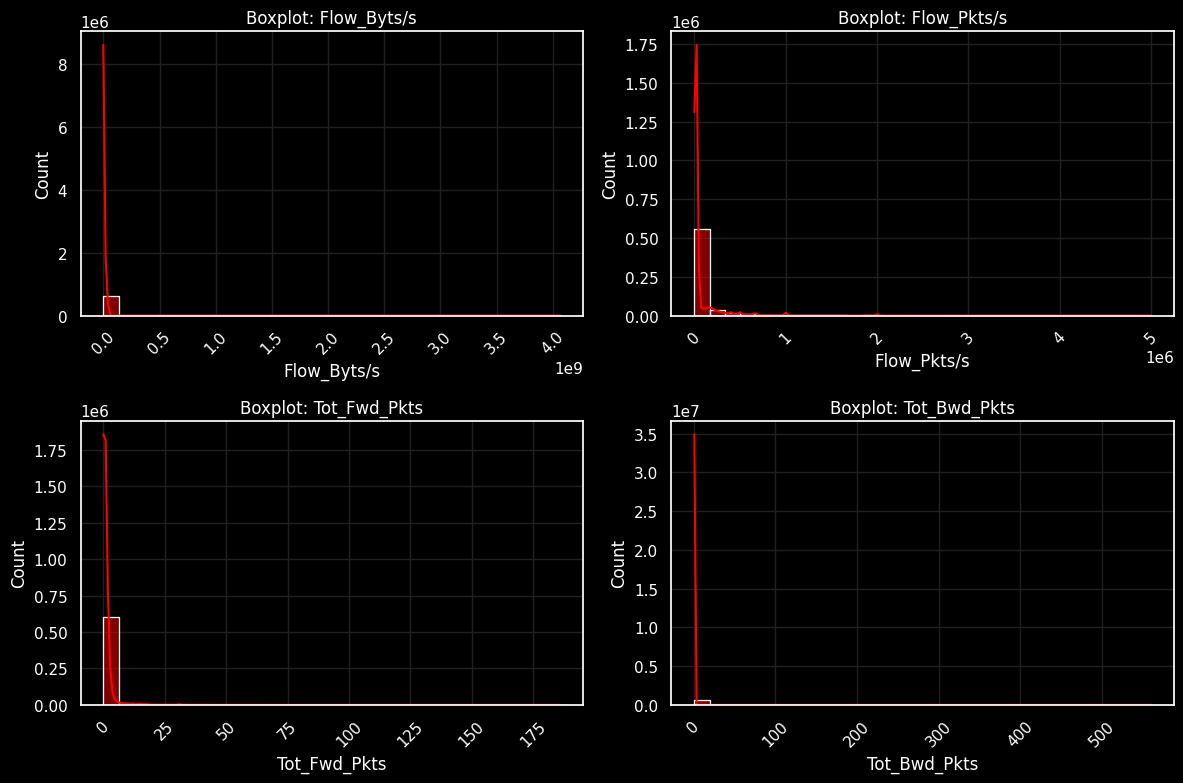

In [22]:
# Transimssion intensity features
col_to_hist = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
plot_histograms(df[col_to_hist])

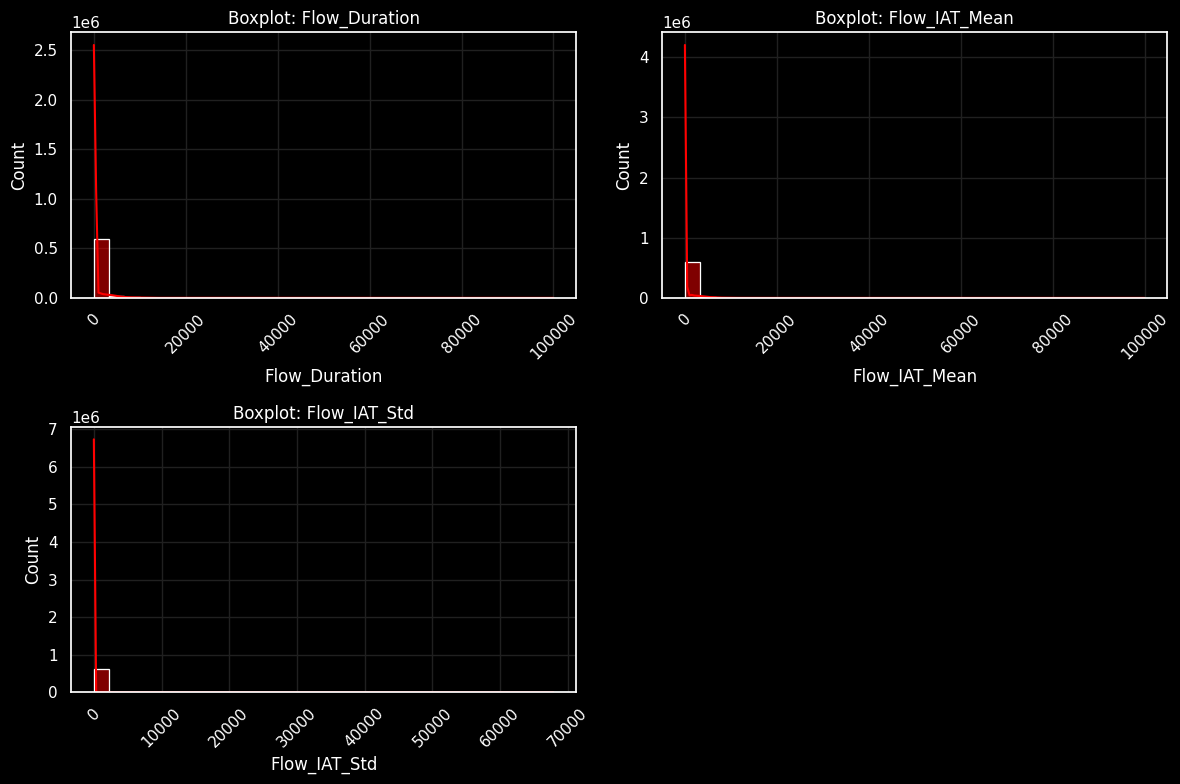

In [23]:
# Transmission regular features
col_to_hist = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
plot_histograms(df[col_to_hist])

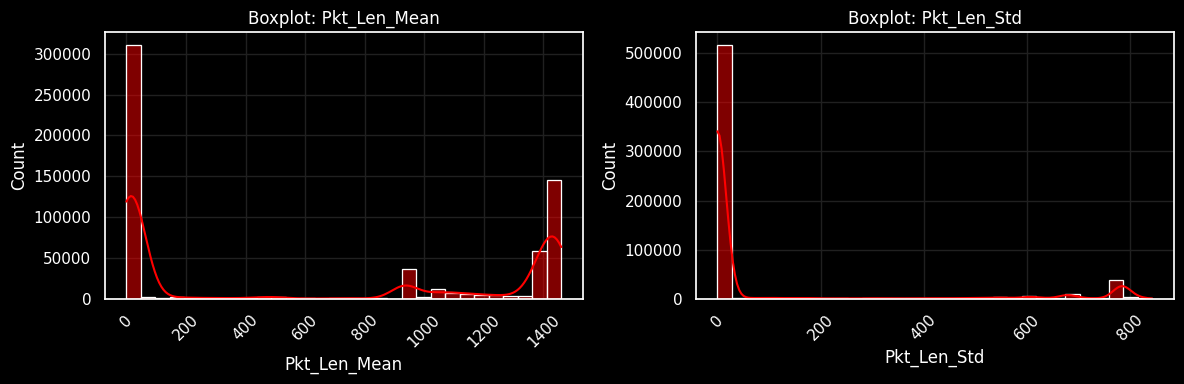

In [24]:
# Transmission packet sizes
col_to_hist = ['Pkt_Len_Mean', 'Pkt_Len_Std']
plot_histograms(df[col_to_hist])

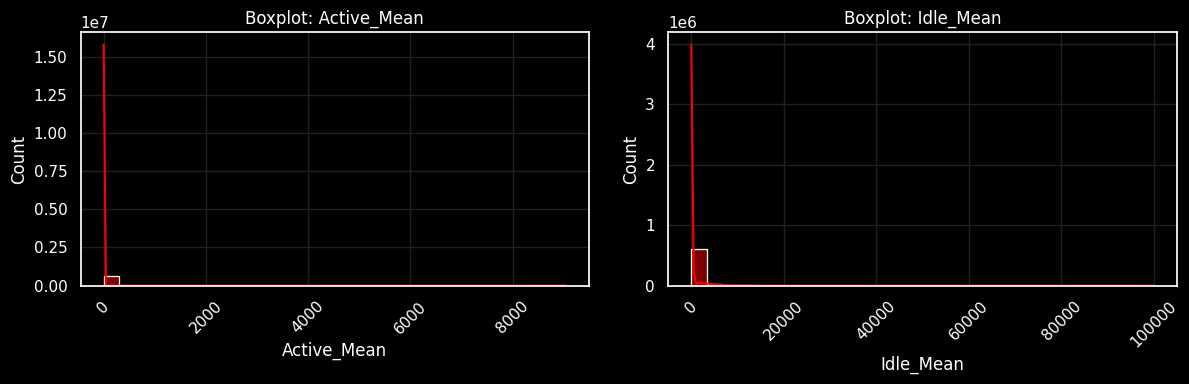

In [25]:
# activity
col_to_hist = ['Active_Mean', 'Idle_Mean']
plot_histograms(df[col_to_hist])

### Results:
To w zasadzie jest nieczytelne. Widać tylko jakiś pik po lewej stronie, na podstawie czego moge stwierdzić że większość danych jest z małą wartością i występują jakieś outliery. Wykresy skośne prawostronnie.

### Log data plots

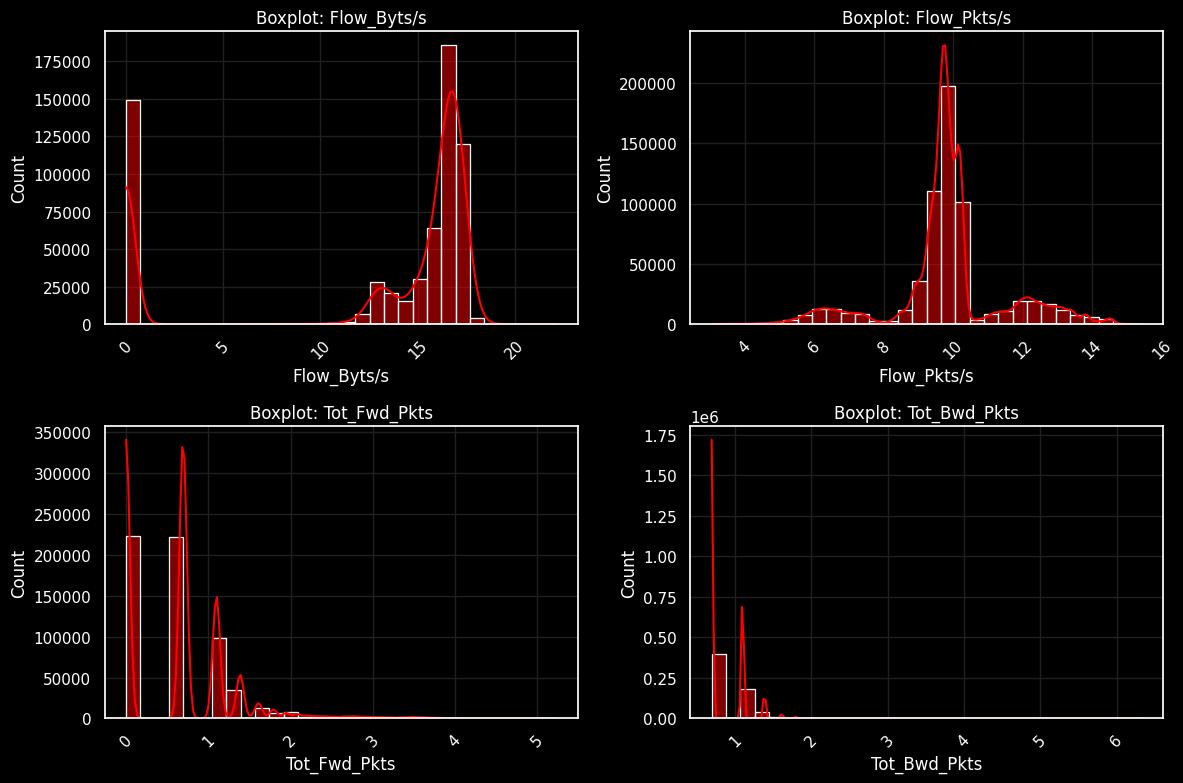

In [26]:
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)

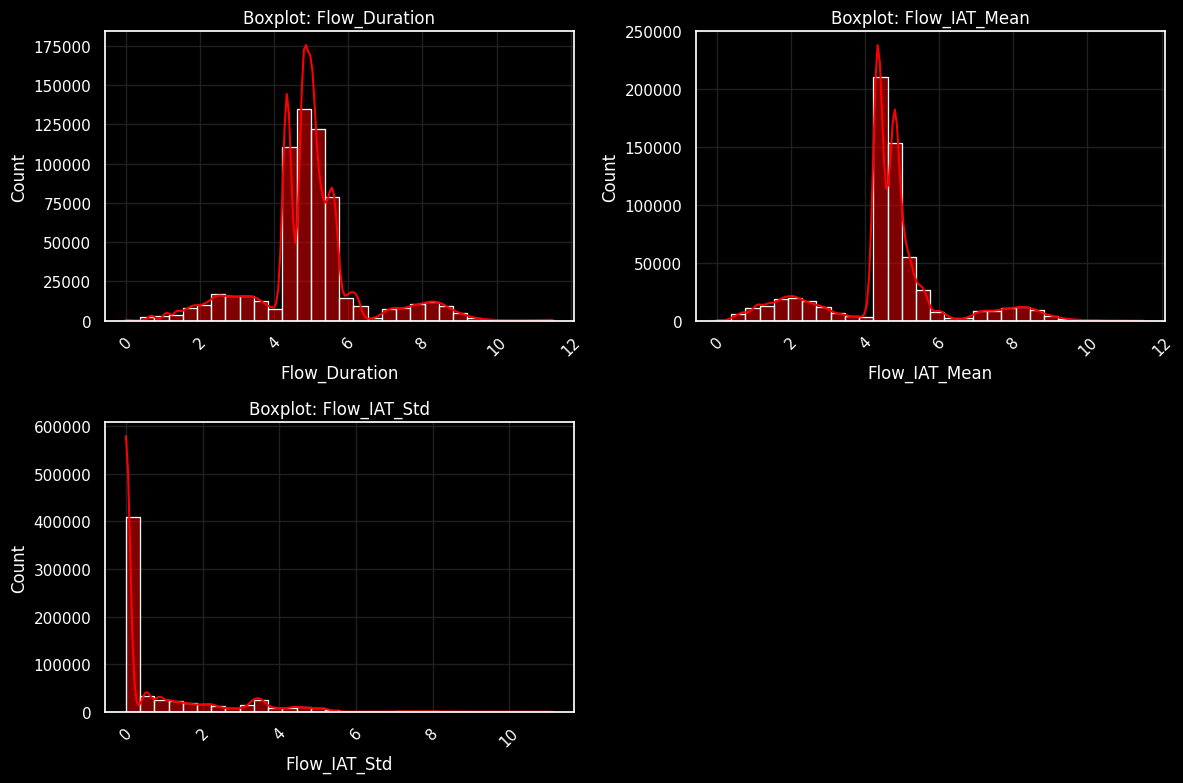

In [27]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)


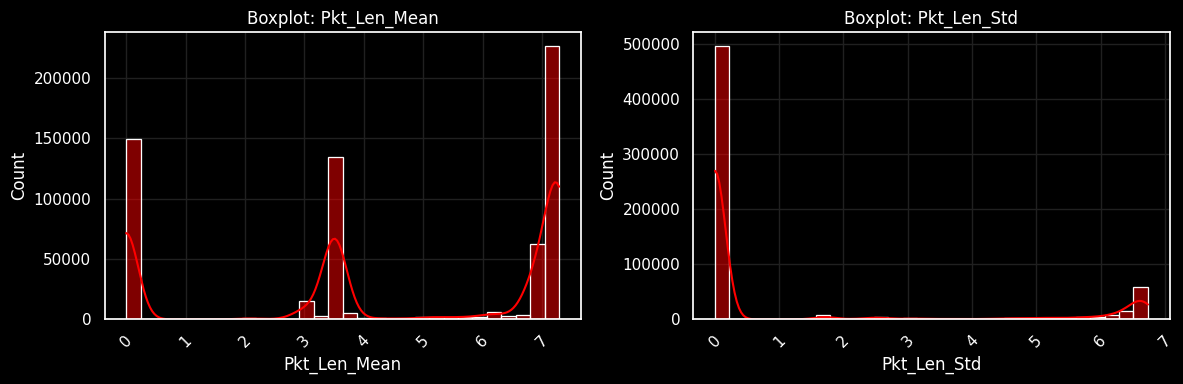

In [28]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)

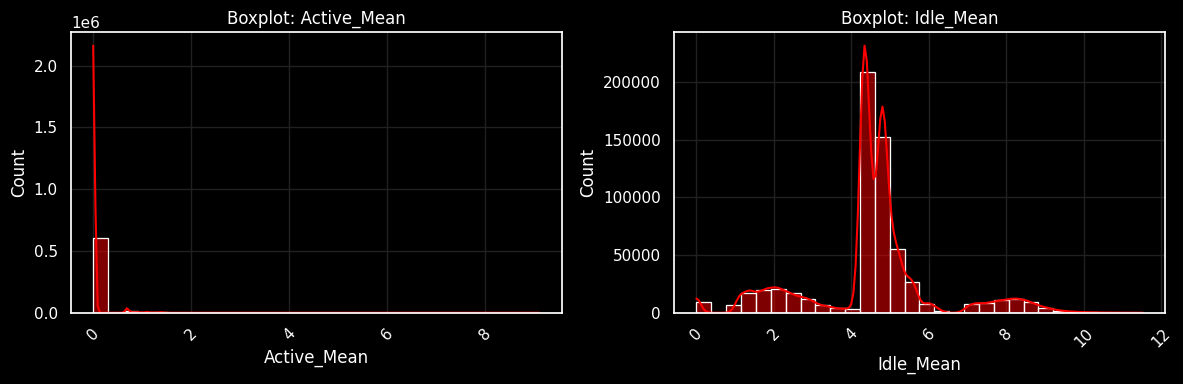

In [29]:
# activity
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
plot_histograms(log_fr)


Dane w skali logartymicznej są czytelniejsze. Po transformacji ujawniła się struktura rozkładów, umożliwiająca identyfikację różnych profili ruchu sieciowego oraz obserwacji odstających odpowiadających atakom.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           625783 non-null  int64  
 1   Flow_Duration      625783 non-null  int64  
 2   Tot_Fwd_Pkts       625783 non-null  int64  
 3   Tot_Bwd_Pkts       625783 non-null  int64  
 4   TotLen_Fwd_Pkts    625783 non-null  float64
 5   TotLen_Bwd_Pkts    625783 non-null  float64
 6   Fwd_Pkt_Len_Max    625783 non-null  float64
 7   Fwd_Pkt_Len_Min    625783 non-null  float64
 8   Fwd_Pkt_Len_Mean   625783 non-null  float64
 9   Fwd_Pkt_Len_Std    625783 non-null  float64
 10  Bwd_Pkt_Len_Max    625783 non-null  float64
 11  Bwd_Pkt_Len_Min    625783 non-null  float64
 12  Bwd_Pkt_Len_Mean   625783 non-null  float64
 13  Bwd_Pkt_Len_Std    625783 non-null  float64
 14  Flow_Byts/s        625783 non-null  float64
 15  Flow_Pkts/s        625783 non-null  float64
 16  Fl

## Boxplots

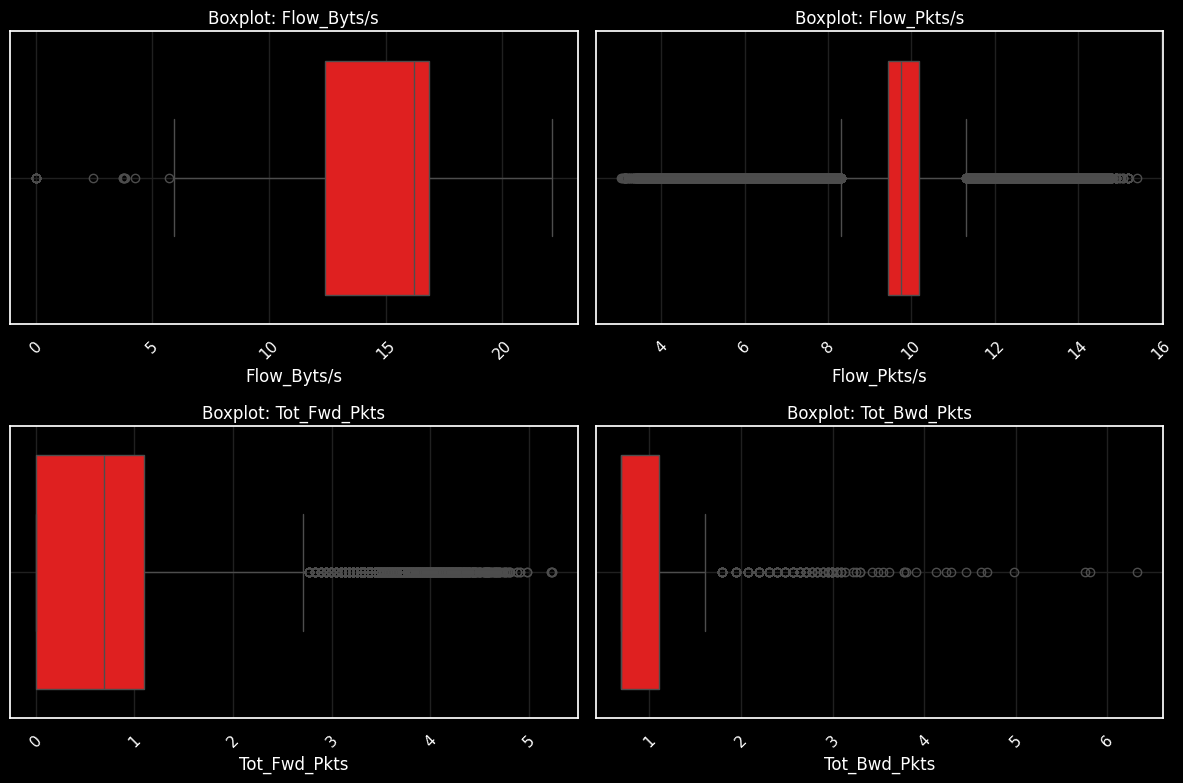

In [31]:
# Boxplots of log transformed features, for better visualization
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)


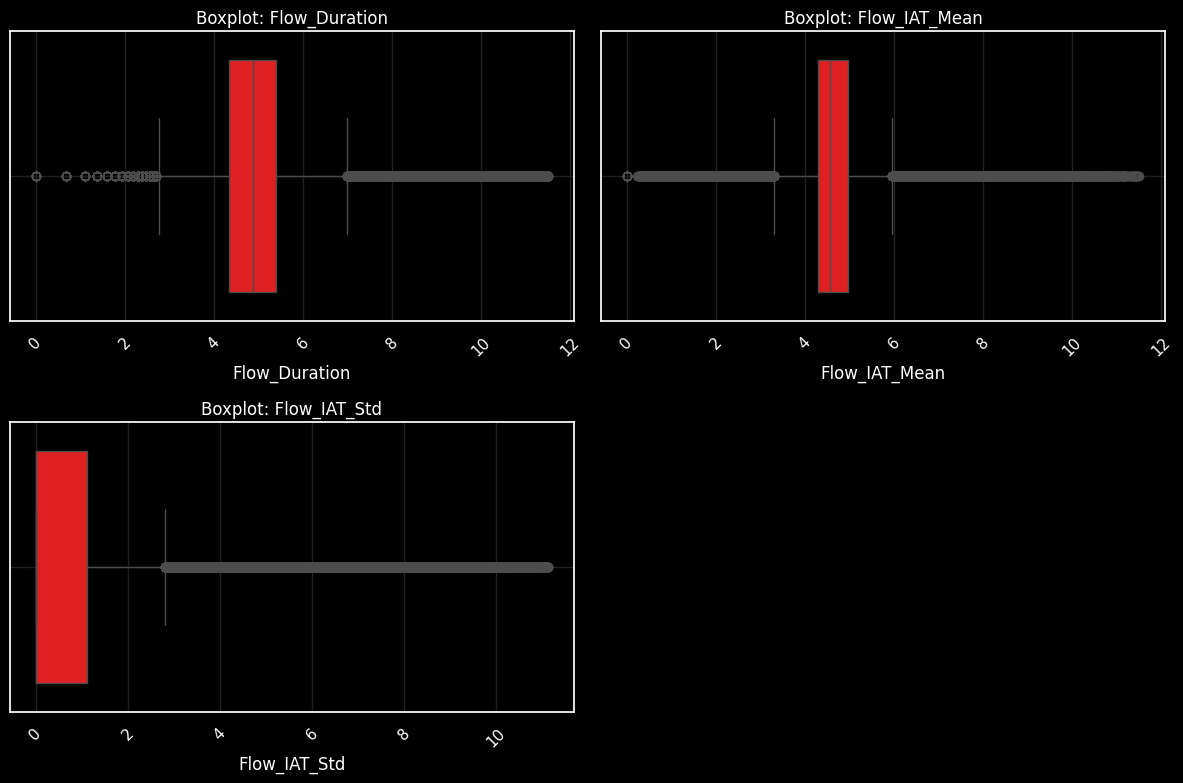

In [32]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

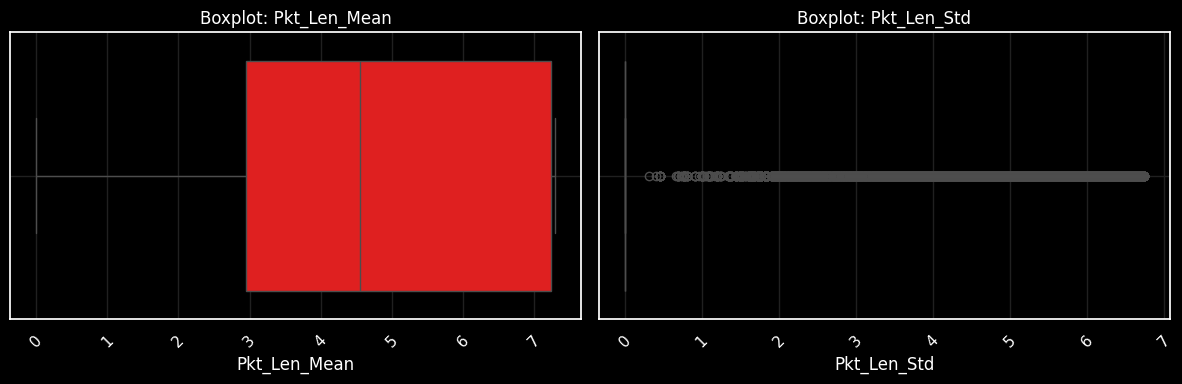

In [33]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

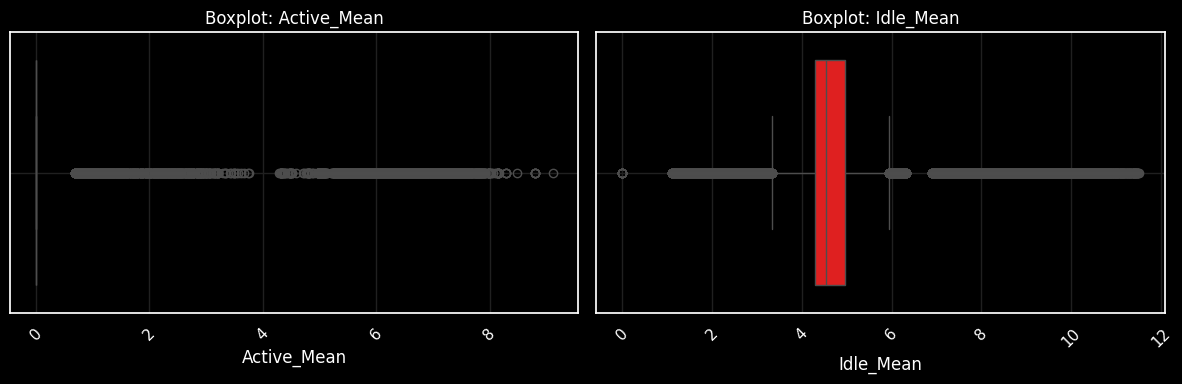

In [34]:
# activity
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
plot_boxplots(log_fr)

## Histograms with Labels

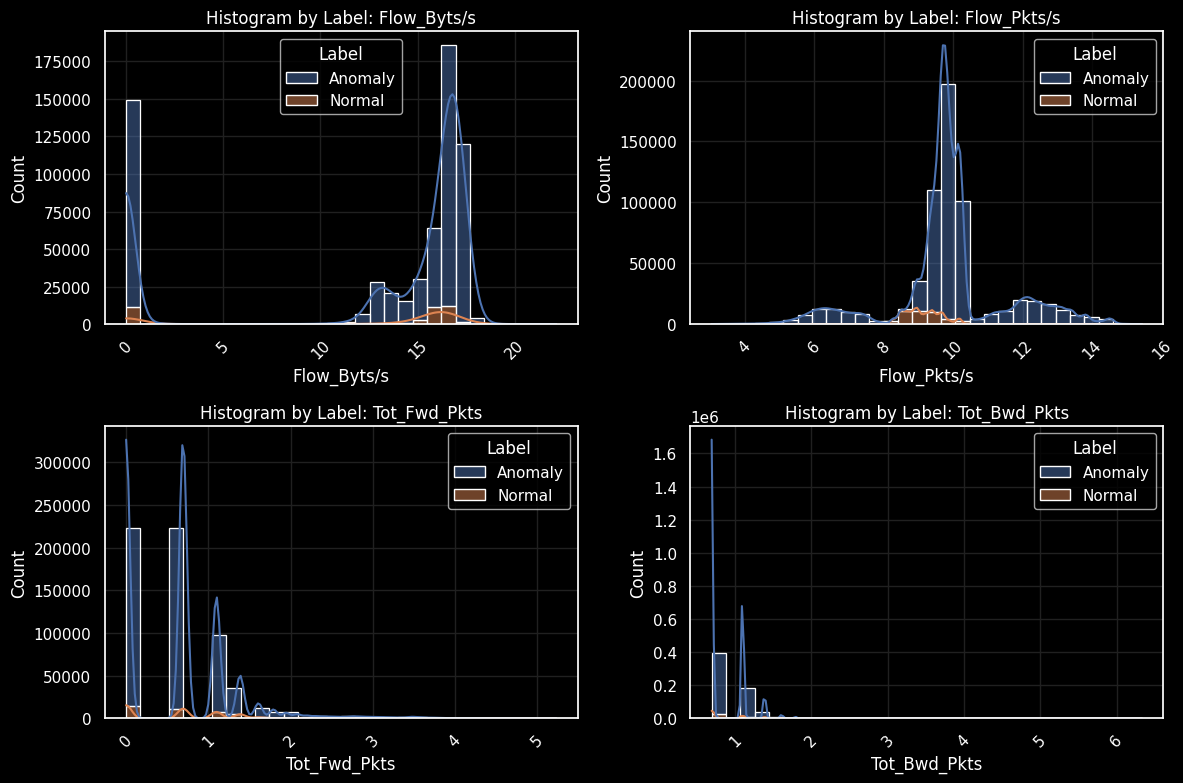

In [47]:
# Boxplots of log transformed features, for better visualization
col = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

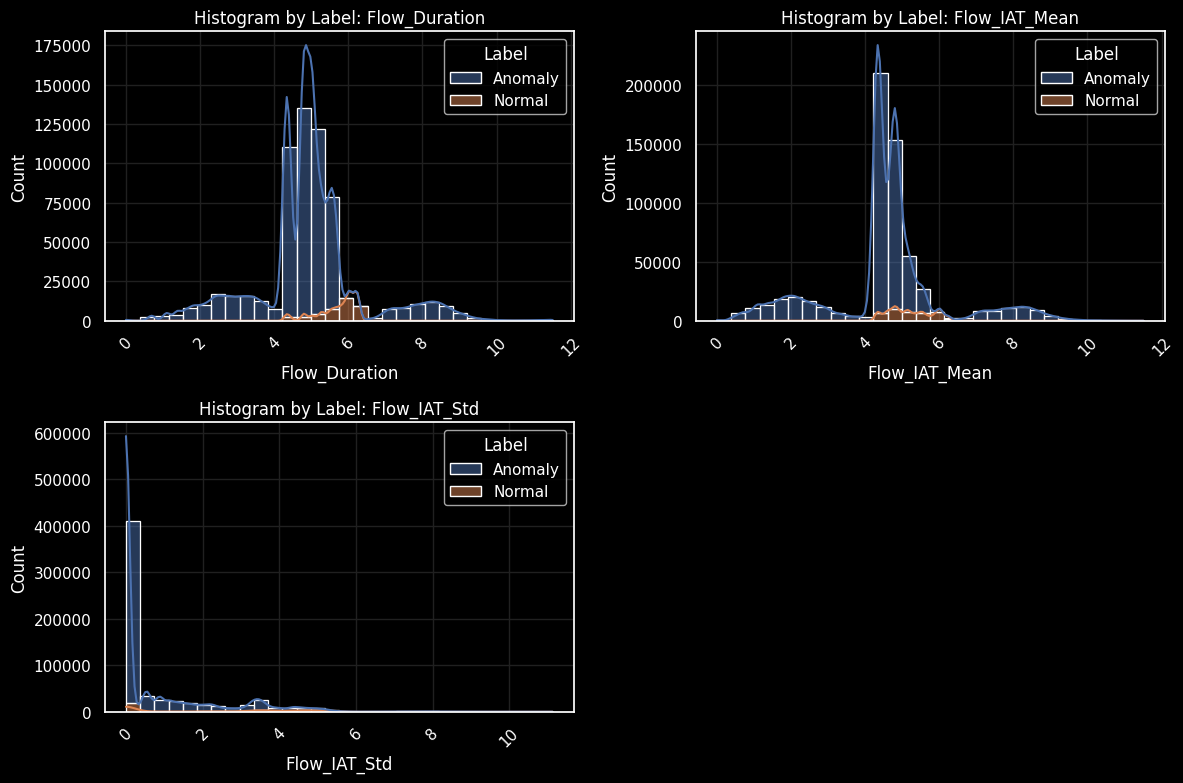

In [48]:
# Transmission regular features
col = ['Flow_Duration', 'Flow_IAT_Mean', 'Flow_IAT_Std']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

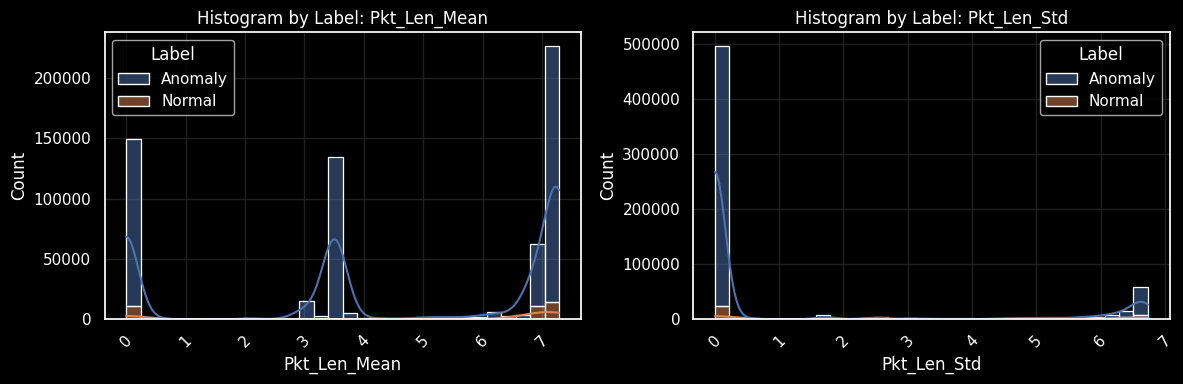

In [49]:
# Transmission packet sizes
col = ['Pkt_Len_Mean', 'Pkt_Len_Std']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

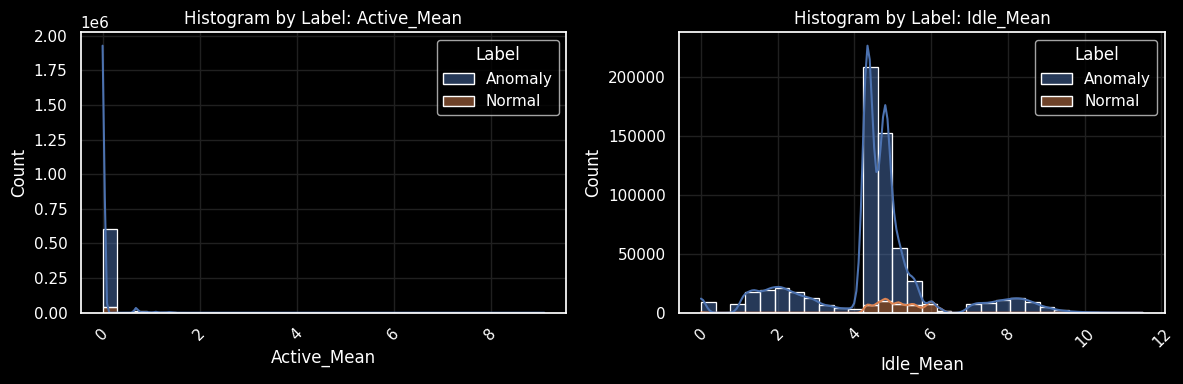

In [50]:
col = ['Active_Mean', 'Idle_Mean']
log_fr = np.log1p(df[col])
log_fr['Label'] = df['Label']
plot_histograms_by_label(log_fr)

# Korelacje
dodaje zlogarytmizowane zmienne, które ujawniają dzięki temu strukturę, nie zniekształcając przenoszonych informacji. Nie logarytmizuje zmiennych czasowych bo zniekształciłoby to przenoszone informacje tj różnica między czas 10 - 100 ms nie jest tożsama z różnicą 100 - 1000 ms.

In [60]:
def plot_corr_heatmap(corr_matrix):
    ''' Plot heatmap of the correlation matrix.'''
    plt.figure(figsize=(12, 10))
    sns.set_theme(style="dark")
    plt.rcParams.update({
        "figure.facecolor": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#202020"
    })
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, square=True, linewidths=.5)
    plt.title("Correlation Heatmap", color='white')
    plt.show()

In [58]:
corr_features = [
    # does not exist yet
    'Flow_Pkts/s_log',
    'Flow_Byts/s_log',
    'Flow_Duration_log',
    'Tot_Fwd_Pkts_log',
    'Tot_Bwd_Pkts_log',

    'Flow_IAT_Mean',
    'Flow_IAT_Std',
    'Pkt_Len_Mean',
    'Pkt_Len_Std',
    'Active_Mean',
    'Idle_Mean'
]
df_corr = df[corr_features[5:]].copy()

columns_to_log = ['Flow_Byts/s', 'Flow_Pkts/s', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'Flow_Duration']
for col in columns_to_log:
    df_corr[col + "_log"] = np.log1p(df[col])

# result
display(df_corr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_IAT_Mean      625783 non-null  float64
 1   Flow_IAT_Std       625783 non-null  float64
 2   Pkt_Len_Mean       625783 non-null  float64
 3   Pkt_Len_Std        625783 non-null  float64
 4   Active_Mean        625783 non-null  float64
 5   Idle_Mean          625783 non-null  float64
 6   Flow_Byts/s_log    625783 non-null  float64
 7   Flow_Pkts/s_log    625783 non-null  float64
 8   Tot_Fwd_Pkts_log   625783 non-null  float64
 9   Tot_Bwd_Pkts_log   625783 non-null  float64
 10  Flow_Duration_log  625783 non-null  float64
dtypes: float64(11)
memory usage: 52.5 MB


None

Spearman bo jest odporny na outliery i dobrze działa podobno na log transformach. Pearsona też sprawdze for fun
## Spearman


In [59]:
corr_spearman = df_corr.corr(method='spearman')

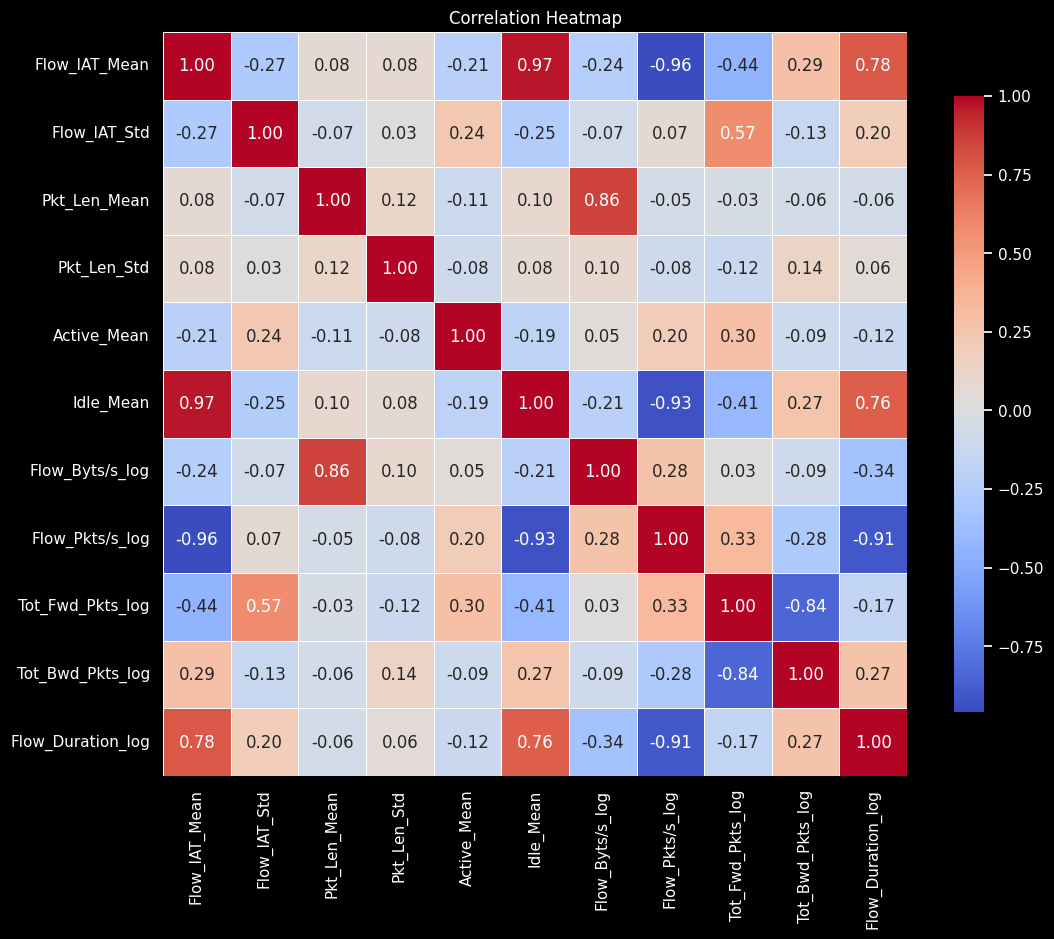

In [61]:
plot_corr_heatmap(corr_spearman)

interpretacja:
- Idle_Mean <-> Flow_IAT_Mean - duża korelacja co jest logiczne - im większe odstępy czasowe między kolejnymi pakietami - tym czas Idle. Jedno do wyrzucenia.
- Flow_Pkts/s_log <-> Flow_IAT_Mean - też logiczne - im wieksza liczba pakietów na sekundę tym mniejszy czas Idle urządzenia.
- Flow_Duration <-> Flow_IAT_Mean - skorelowane, ale mam wątpliwości co do tego czy w rzeczywistości te dwie wartości są od siebie zależne!
- Pkt_Len_Mean <-> Flow_Bytes/s_log - liczba bajtów w flow będzie między innymi zależna od rozmiaru pakietu - możliwe że Flow Bytes do wyrzucenia ale w sumie mierzą osobno przepływ liczba to jeszcze nie wiem??
- Flow_Bytes/s_log <-> Idle_Mean - im rzadziej wysyła tym mniejszy przepływ
- Flow_Pkts/s_log <-> Flow_Duration_log - silna korelacja, ale fizycznie to nie jest powiązane!!! nie moge raczej tego wyrzucić, chyba że do modelu liniowego...
- Tot_Fwd_Pkts_log <-> Tot_Bwd_Pkts_log - niby skorelowane ale różnica niesie cenną informację - lepiej zastąpić: df['Fwd_Bwd_Ratio'] = df['Tot_Fwd_Pkts_log'] - df['Tot_Bwd_Pkts_log']

* Flow_IAT_Mean - wyrzucić
* Tot_Fwd_Pkts_log i Tot_Bwd_Pkts_log zastąpić: df['Fwd_Bwd_Ratio'] = df['Tot_Fwd_Pkts_log'] - df['Tot_Bwd_Pkts_log']

In [51]:
# # activity
# col = ['Active_Mean', 'Idle_Mean']
# log_fr = np.log1p(df[col])
# plot_scattermatrix(log_fr)